In [1105]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
import os
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

In [1106]:
# df_drop.head()

In [1107]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

In [1108]:
df = pd.read_excel("data\DEM Simulations Data.xlsx", usecols="A:I")
df.head()


,Name,friction coeff,adhesive dist,force fraction,restitution coeff,rolling resistance,tangential stiffness,simulated AoR,predicted AoR
0,sim2,0.44,0.0011,0.22,0.22,0.32,0.52,42.957606,NaN
1,sim4,0.35,0.0007,0.40,0.17,0.32,0.75,43.763328,NaN
2,sim5,0.20,0.0005,0.10,0.10,0.20,0.20,28.576794,NaN
3,sim7,0.80,0.0005,0.34,0.22,0.56,0.20,46.152702,NaN
4,sim8,0.38,0.0013,0.31,0.12,0.51,0.60,51.285944,NaN


In [1109]:
drop_indexes = [2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18]
df_drop = df.copy()
df_drop.drop(drop_indexes, axis=0, inplace=True)
df_drop.head()

,Name,friction coeff,adhesive dist,force fraction,restitution coeff,rolling resistance,tangential stiffness,simulated AoR,predicted AoR
0,sim2,0.440000,0.001100,0.220000,0.220000,0.320000,0.520000,42.957606,NaN
1,sim4,0.350000,0.000700,0.400000,0.170000,0.320000,0.750000,43.763328,NaN
5,sim9,0.500000,0.001000,0.200000,0.200000,0.400000,0.700000,48.167879,NaN
6,sim10,0.300000,0.001200,0.320000,0.290000,0.300000,0.400000,46.872942,NaN
16,sim21,0.260416,0.001039,0.315308,0.367341,0.550838,0.218895,43.175327,NaN


In [1110]:
set_orig = df.to_numpy()
set_drop = df_drop.to_numpy()

X_orig = set_orig[:,1:7]
y_orig = set_orig[:,7]

X_drop = set_drop[:,1:7]
y_drop = set_drop[:,7]
print(X_orig.shape, X_drop.shape)

(21, 6) (8, 6)


In [1111]:
def list_files_in_dir(path):
    file_list = []
    for fname in os.listdir(path):
        newpath = os.path.join(path, fname)
        if os.path.isdir(newpath):
            # skip directories
            continue
        file_list.append(fname)
    file_list.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    return file_list

In [1112]:
# def evaluate_model(y, y_hat):
#     pred_r2 = r2_score(y, y_hat) 
#     pred_MAE = mean_absolute_error(y, y_hat) 
#     pred_MSE = mean_squared_error(y, y_hat) 
#     return [pred_r2, pred_MAE, pred_MSE]

In [1113]:
def evaluate_model(input_model, X_test, y_test):
    y_hat = input_model.predict(X_test)
    curr_r2 = r2_score(y_test, y_hat) 
    curr_MAE = mean_absolute_error(y_test, y_hat) 
    curr_MSE = mean_squared_error(y_test, y_hat) 
    return curr_r2, curr_MAE, curr_MSE
    print(f"{algo}\t{curr_r2=:.2f}\t{curr_MAE=:.2f}\t{curr_MSE=:.2f}")
    X_train.append(X_tr)
    model_scores.append([algo, curr_r2, curr_MAE, curr_MSE])

In [1114]:
path_to_dir = "new3/"
# path_to_dir = "models/"
model_list = list_files_in_dir(path_to_dir)

In [1115]:
print(X_drop.shape, y_drop.shape)

(8, 6) (8,)


In [1116]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
Lasso().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [1117]:
errors = []
errors_drop = []
predicted_aor = []
predicted_aor_drop = []
evaluated_models = []
for iter, file in enumerate(model_list):
    predicted_aor = []
    errors = []
    loaded_model = pickle.load(open(f'{path_to_dir}{file}', 'rb'))

    curr_r2, curr_MAE, curr_MSE = evaluate_model(loaded_model, X_orig, y_orig)
        # loaded_model = pickle.load(open(f"models/{file}", 'rb'))
        # loaded_model = pickle.load(open(f"rf_regressor.pkl", 'rb'))
        # y_hat = loaded_model.predict(X_orig)
        # print(i)
    # print(f'Started {file}: {iter}')

    # if res[0] > 0.5:
    #     print(f'Started {file}: {iter}')
    #     print(res)
    evaluated_models.append([file, curr_r2, curr_MAE, curr_MSE])

# print(evaluated_models)


In [1118]:
# scores_array = np.zeros([len(evaluated_models),8])

In [1119]:
evaluated_models

[['enet_0.2_42_aug1j.pkl',
  0.5728073265049669,
  2.8680549083956923,
  12.761464838241945],
 ['gb_0.2_42_aug1j.pkl',
  0.33305869756267825,
  3.6082364590789076,
  19.923440892822633],
 ['lasso_0.2_42_aug1j.pkl',
  0.4207787712911981,
  3.3861323046667517,
  17.302991840323813],
 ['lr_0.2_42_aug1j.pkl',
  0.5728073265049898,
  2.8680549083956266,
  12.761464838241263],
 ['rf_0.2_42_aug1j.pkl',
  0.23985716895941778,
  3.829733170128722,
  22.7076366525721],
 ['ridge_0.2_42_aug1j.pkl',
  0.38268950025287685,
  3.5458070669721864,
  18.440827115196466],
 ['enet_0.2_42_aug3j.pkl',
  0.5261554758781231,
  3.068041475667773,
  14.155088812507756],
 ['gb_0.2_42_aug3j.pkl',
  0.5023571699909657,
  3.406714275424852,
  14.866012156075385],
 ['lasso_0.2_42_aug3j.pkl',
  0.42916604195349084,
  3.2704696536845126,
  17.05244011908295],
 ['lr_0.2_42_aug3j.pkl',
  0.5261554758780769,
  3.06804147566795,
  14.155088812509131],
 ['rf_0.2_42_aug3j.pkl',
  0.41625939642751264,
  3.7255932363871147,
 

In [1120]:
scores_array = np.array(evaluated_models)

In [1121]:
print(scores_array[:,1])

['0.5728073265049669' '0.33305869756267825' '0.4207787712911981'
 '0.5728073265049898' '0.23985716895941778' '0.38268950025287685'
 '0.5261554758781231' '0.5023571699909657' '0.42916604195349084'
 '0.5261554758780769' '0.41625939642751264' '0.4235007193520818'
 '0.5800409255840895' '0.3546946746664563' '0.3624408004378884'
 '0.5800409255844624' '0.5838365792000332' '0.35187237866028875'
 '0.6499224684175733' '0.41009606788833275' '0.41489064553609856'
 '0.6499224684174325' '0.5467734462305776' '0.4225574409843078'
 '0.5672524121167306' '0.432569918008348' '0.43610360139245197'
 '0.5672524121167093' '0.6816264153361569' '0.46444772916199084'
 '0.6260860949070924' '0.36898263488753413' '0.4468205326768322'
 '0.6260860949069482' '0.6694987118966251' '0.5071645020753236'
 '0.6332789445275796' '0.11500166164055592' '0.4375271898892661'
 '0.6332789445271022' '0.6548900483452715' '0.5554440838497041']


In [1122]:
import re
scores_array2 = []

for i, contents in enumerate(scores_array):
    splitted = contents[0].split('_')
    splitted[0] = ''.join([i for i in splitted[0] if not i.isdigit()])
    try:    
        splitted[3] = int(''.join(filter(str.isdigit, splitted[3])))
    except:
        pass
    if len(splitted)>4:
    # if contents
        print(splitted)
    scores_array2.append(splitted)

# evaluated_models.append(scores_array2)


In [1123]:
length = max(map(len, scores_array2))
y=np.array([xi+[None]*(length-len(xi)) for xi in scores_array2])



In [1124]:
import pandas as pd
columns = ["Filename", "R2", "MAE", "MSE", "model", "split_size", "rand", "aug"]
data=np.hstack((scores_array,y))
plotdata = pd.DataFrame(data,columns=columns)

In [1125]:
plotdata['R2'] = plotdata['R2'].astype(float)
plotdata['MAE'] = plotdata['MAE'].astype(float)
plotdata['MSE'] = plotdata['MSE'].astype(float)
plotdata['aug'] = plotdata['aug'].astype(int)

In [1126]:
sort_df = plotdata.loc[plotdata['R2'] > 0.1]
sort_df.head()

,Filename,R2,MAE,MSE,model,split_size,rand,aug
0,enet_0.2_42_aug1j.pkl,0.572807,2.868055,12.761465,enet,0.2,42,1
1,gb_0.2_42_aug1j.pkl,0.333059,3.608236,19.923441,gb,0.2,42,1
2,lasso_0.2_42_aug1j.pkl,0.420779,3.386132,17.302992,lasso,0.2,42,1
3,lr_0.2_42_aug1j.pkl,0.572807,2.868055,12.761465,lr,0.2,42,1
4,rf_0.2_42_aug1j.pkl,0.239857,3.829733,22.707637,rf,0.2,42,1


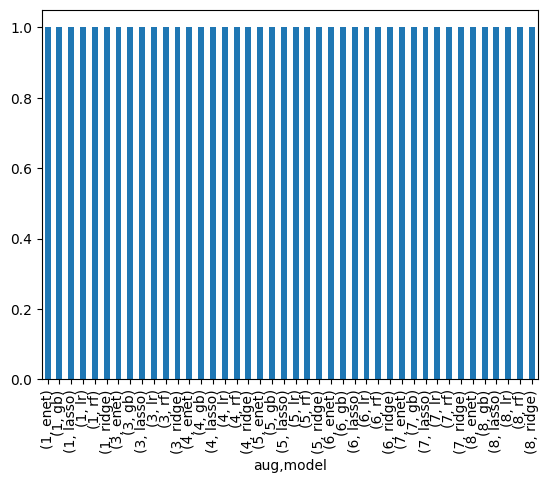

In [1127]:
# gca stands for 'get current axis'
import matplotlib.pyplot as plt
sort_df.groupby(['aug','model']).size().plot(kind='bar',stacked=True)
plt.show()


<AxesSubplot: >

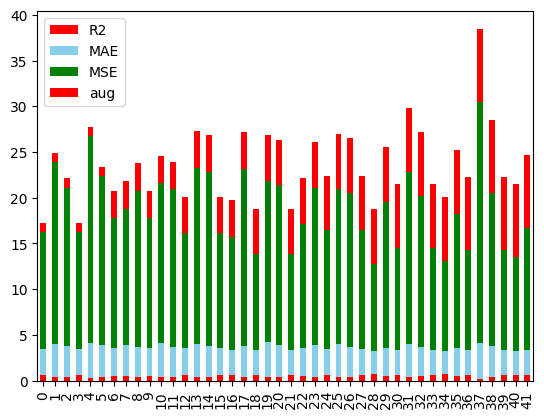

In [1128]:
sort_df.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])


<AxesSubplot: xlabel='model', ylabel='MAE'>

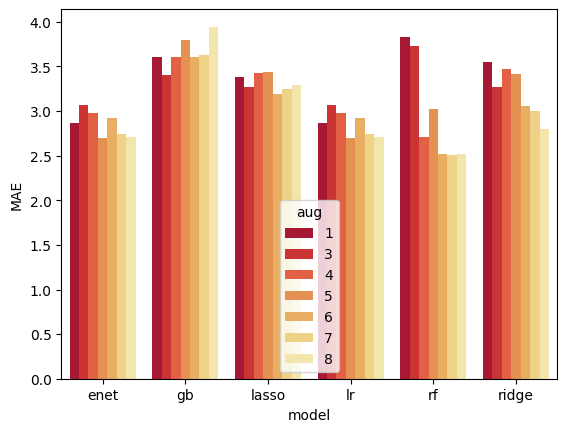

In [1152]:
import seaborn as sns
sns.barplot(data=sort_df, x="model", y="MAE", hue="aug", palette="YlOrRd_r")

In [1130]:
scores_array[1]

array(['gb_0.2_42_aug1j.pkl', '0.33305869756267825', '3.6082364590789076',
       '19.923440892822633'], dtype='<U32')

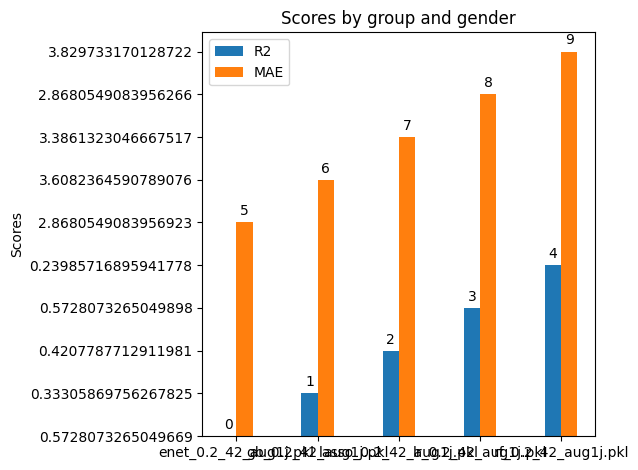

In [1131]:
import matplotlib.pyplot as plt
import numpy as np


# labels = ['G1', 'G2', 'G3', 'G4', 'G5']
labels =scores_array[0:5,0]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, scores_array[0:5,1], width, label='R2')
rects2 = ax.bar(x + width/2, scores_array[0:5,2], width, label='MAE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [1132]:
loaded_model = pickle.load(open(f'new2/rf_0.2_42_aug9j.pkl', 'rb'))
evaluate_model(loaded_model, X_orig, y_orig)


(0.7245994707229866, 2.2397974441796955, 8.227000107581881)

In [1133]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(loaded_model, X_orig, y_orig)
scores = cv_results["test_score"]
print(f"Accuracy score via cross-validation:\n"
      f"{scores.mean():.3f} ± {scores.std():.3f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Accuracy score via cross-validation:
-4.588 ± 1.015


In [1134]:
df['predicted AoR'] = predicted_aor
df['error'] = errors
df_drop['predicted AoR'] = predicted_aor_drop
df_drop['error'] = errors_drop


ValueError: Length of values (0) does not match length of index (21)

In [ ]:
y_test = np.array(df['simulated AoR'])
y_hat = np.array(predicted_aor)
y_test_dropped = np.array(df_drop['simulated AoR'])
y_hat_dropped = np.array(predicted_aor_drop)
print(y_test.shape)
print(y_hat.shape)
print(y_test_dropped.shape)
print(y_hat_dropped.shape)


In [ ]:
print(f'{len(y_hat_dropped)=}, {len(y_test_dropped)}')

In [ ]:
y_test_dropped

In [ ]:
for i in range(len(y_test)):
    print(f'{y_test[i]=:.2f}, {y_test[i]=:.2f}')

In [ ]:
writer = pd.ExcelWriter('predicted_aor_dropped.xlsx')
# write dataframe to excel
 
df_drop.to_excel(writer)
 
# save the excel
writer.save()
print("DataFrame is exported successfully to 'converted-to-excel.xlsx' Excel File.")
